# Análise Jurássica

####  Fonte: https://www.kaggle.com/datasets/kjanjua/jurassic-park-the-exhaustive-dinosaur-dataset/data
O dataset utilizado nessa análise é de 2021 e foi construído através de um webscrapping do site do Museu de História Natural do Reino Unido.


### 1. Definição do problema: 
- Em quais países identificamos os maiores dinossauros?
- Quais períodos jurássicos possuíam os maiores dinossauros? 
- Qual o tipo da dieta de dinossauro mais catalogada no dataset? (carnívoro, herbívoro, onívoro)

### 2. Preparação e exploração de dados.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Rejeitando warnings
import warnings 

warnings.filterwarnings('ignore')

In [3]:
# Encontrei um erro na linha 52 do arquivo original.
# o que me obrigou a abrir o arquivo csv e ir até tal linha identificar um erro na separação por vírgulas.
# importei o arquivo editado como dinos1 e ficará disponível na pasta de arquivos do projeto.

In [4]:
# Leitura dos dados
dados = pd.read_csv('data/dinos1.csv', sep = ',')
dados.head()

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link;
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...


In [5]:
# eliminando informações N/A
dados.dropna()

,name,diet,period,lived_in,type,length,taxonomy,named_by,species,link;
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbivorous,Late Cretaceous 83-70 million years ago,USA,ceratopsian,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,achillobator,carnivorous,Late Cretaceous 99-84 million years ago,Mongolia,large theropod,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,acrocanthosaurus,carnivorous,Early Cretaceous 115-105 million years ago,USA,large theropod,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...
...,...,...,...,...,...,...,...,...,...,...
303,yinlong,herbivorous,Mid Jurassic 159-154 million years ago,China,ceratopsian,1.2m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Xu Forster Clark and Mo (2006),downsi,https://www.nhm.ac.uk/discover/dino-directory/...
304,yuanmousaurus,herbivorous,Mid Jurassic 180-159 million years ago,China,sauropod,17.0m,Dinosauria Saurischia Sauropodomorpha Sauropod...,Lü Li Ji Wang Zhang and Dong (2006),jiangyiensis,https://www.nhm.ac.uk/discover/dino-directory/...
305,yunnanosaurus,omnivorous,Early Jurassic 205-190 million years ago,China,sauropod,7.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Young (1942),huangi,https://www.nhm.ac.uk/discover/dino-directory/...
306,zalmoxes,herbivorous,Late Cretaceous 69 million years ago,Romania,euornithopod,3.0m,Dinosauria Ornithischia Genasauria Cerapoda Or...,Nopcsa (1902),robustus,https://www.nhm.ac.uk/discover/dino-directory/...


In [6]:
# Verificando o tamanho do dataset e demais informações
dados.shape

(309, 10)

O dataset possui 309 linhas e 10 colunas.

In [7]:
dados.dtypes

name        object
diet        object
period      object
lived_in    object
type        object
length      object
taxonomy    object
named_by    object
species     object
link;       object
dtype: object

##### A partir daqui passarei as colunas para Português do Brasil, visto que acho mais prático a quem está acompanhando o notebook não ter que acompanhar o sumário de variáveis ou ter domínio da língua inglesa. 

In [8]:
dados = dados.rename(columns = {'name': 'Nome do Dinossauro', 
                 'diet': 'Dieta', 
                 'period': 'Período',
                 'lived_in': 'Região/País',
                 'type': 'Tipo', 
                 'length': 'Comprimento', 
                 'taxonomy': 'Taxonomia', 
                 'named_by': 'Nomeado por',
                 'species': 'Espécie'})
# vamos ler somente os dois primeiros dinossauros somente para checar a alteração
dados.head(2)

,Nome do Dinossauro,Dieta,Período,Região/País,Tipo,Comprimento,Taxonomia,Nomeado por,Espécie,link;
0,aardonyx,herbivorous,Early Jurassic 199-189 million years ago,South Africa,sauropod,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnivorous,Late Cretaceous 74-70 million years ago,Argentina,large theropod,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...


In [9]:
# checando as colunas que possuem dados em inglês e utilizaremos nas análises
dados['Dieta'].unique()

array(['herbivorous', 'carnivorous', 'omnivorous', 'unknown',
       'herbivorous/omnivorous'], dtype=object)

In [10]:
dados['Período'].unique()

array(['Early Jurassic 199-189 million years ago',
       'Late Cretaceous 74-70 million years ago',
       'Late Cretaceous 83-70 million years ago',
       'Late Cretaceous 99-84 million years ago',
       'Early Cretaceous 115-105 million years ago',
       'Late Cretaceous 98-93 million years ago',
       'Early Cretaceous 132-121 million years ago',
       'Late Jurassic 169-159 million years ago',
       'Late Cretaceous 70-65 million years ago',
       'Late Cretaceous 80-75 million years ago',
       'Late Cretaceous 76-74 million years ago',
       'Late Cretaceous 90-70 million years ago',
       'Late Cretaceous 71-65 million years ago',
       'Late Jurassic 156-144 million years ago',
       'Late Cretaceous 89-85 million years ago',
       'Early Cretaceous 132-127 million years ago',
       'Early Jurassic 195-180 million years ago',
       'Mid Jurassic 177-169 million years ago',
       'Early Jurassic 190 million years ago',
       'Late Cretaceous 74-67 million years

In [11]:
dados['Região/País'].unique()

array(['South Africa', 'Argentina', 'USA', 'Mongolia', 'Egypt', 'Niger',
       'China', 'Canada', 'France', 'Uruguay', 'Spain', 'Kazakhstan',
       'Germany', 'Uzbekistan', 'Australia', 'India', 'United Kingdom',
       'North Africa', 'Zimbabwe', 'Antarctica', 'Morocco', 'Tanzania',
       'Japan', 'Brazil', nan, 'Madagascar', 'Lesotho', 'Romania',
       'Malawi', 'Tunisia', 'Russia', 'Wales', 'Switzerland'],
      dtype=object)

In [12]:
dados['Tipo'].unique()

array(['sauropod', 'large theropod', 'ceratopsian', 'euornithopod',
       'small theropod', 'armoured dinosaur', '1.0m'], dtype=object)

In [13]:
# partindo para as traduções, tentei de outras formas para Período
# fiquei com um impasse em relação aos anos, pois o meu intuito era somente encurtar os nomes 
# sei que poderia ter utilizado um API de tradução, mas não era meu intuito nesse projeto
# queria fazer "na mão" todas as alterações necessárias
# entretanto, foi razoávelmente rápido seguir a mesma maneira para todas as traduções

def rename_dieta(dados):
    if dados['Dieta'] == 'herbivorous':
        return 'herbívoro'
    if dados['Dieta'] == 'carnivorous':
        return 'carnívoro'
    if dados['Dieta'] == 'omnivorous':
        return 'onívoro'
    if dados['Dieta'] == 'unknown':
        return 'desconhecido'
    if dados['Dieta'] == 'herbivorous/omnivorous':
        return 'herbívoro/onívoro'
    
def rename_periodo(dados):
    if dados['Período'] == 'Early Jurassic 199-189 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Late Cretaceous 74-70 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 83-70 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 99-84 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 115-105 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 98-93 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 132-121 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Jurassic 169-159 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 70-65 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 80-75 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 76-74 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 90-70 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 71-65 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Jurassic 156-144 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 89-85 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 132-127 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Early Jurassic 195-180 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Mid Jurassic 177-169 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Early Jurassic 190 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Late Cretaceous 74-67 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 84-65 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Jurassic 154-145 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 94-84 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 121-99 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Late Jurassic 147 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 95-70 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 90 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 72-67 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 121-97 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 84-71 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 112-99 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 85-80 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Jurassic 185-170 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Late Jurassic 155-145 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Early Cretaceous 125 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 142-132 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 127-121 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Mid Jurassic 180-159 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Late Jurassic 155-140 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 89-88 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Mid Jurassic 150 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Late Cretaceous 99-90 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Jurassic 150-140 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 98-94 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 70 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 125-122 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 142-127 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Jurassic 153-148 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Mid Jurassic 175-160 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Mid Jurassic 170-160 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Late Jurassic 152-145 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Triassic 227-210 million years ago':
        return 'Fim do Triássico'
    if dados['Período'] == 'Late Jurassic 159-142 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Jurassic 79-67 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 81-75 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Triassic 225-190 million years ago':
        return 'Fim do Triássico'
    if dados['Período'] == 'Late Triassic 221-210 million years ago':
        return 'Fim do Triássico'
    if dados['Período'] == 'Late Jurassic 145-140 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 81-76 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Jurassic 170 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Late Jurassic 154-150 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Mid Jurassic 170 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Late Cretaceous 70-66 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 120-110 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 99-94 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Jurassic 150-135 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Jurassic 169-164 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 76-65 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 74 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Jurassic 154-151 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Mid Jurassic 190-180 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Late Triassic 228 million years ago':
        return 'Fim do Triássico'
    if dados['Período'] == 'Early Cretaceous 127-99 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Early Cretaceous':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 99-89 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Jurassic 154-142 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 76-70 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Mid Jurassic 165 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Late Cretaceous 86-71 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 112-90 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 80-73 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Jurassic 159-154 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 78-74 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Jurassic 205 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Late Cretaceous 72-68 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 150-135 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 140-110 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Early Jurassic 205-190 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Early Cretaceous 132-94 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Jurassic 169-164 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Jurassic 155-150 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Early Jurassic 205-180 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Mid Jurassic 169-164 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Early Cretaceous 115-110 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 67-65 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Jurassic 213-200 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Late Triassic 205-202 million years ago':
        return 'Fim do Triássico'
    if dados['Período'] == 'Early Jurassic 203-196 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Early Jurassic 200-195 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Early Cretaceous 121-112 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Triassic 205-195 million years ago':
        return 'Fim do Triássico'
    if dados['Período'] == 'Early Jurassic 208-204 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Late Cretaceous 80 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Mid Jurassic 170-155 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Late Triassic 227-221 million years ago':
        return 'Fim do Triássico'
    if dados['Período'] == 'Late Cretaceous 86-66 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 81-68 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 110-100 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 89-84 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 94-89 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Mid Jurassic 159-132 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Mid Jurassic 169-159 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Late Jurassic 150-144 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 74-65 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 115-100 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 85-75 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 79-75 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Jurassic':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Mid Jurassic 164-159 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Late Jurassic 164-159 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Triassic 210 million years ago':
        return 'Fim do Triássico'
    if dados['Período'] == 'Mid Jurassic 195-180 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Late Cretaceous 80-65 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 77-75 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 122-120 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 120-100 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 86-84 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 95 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Jurassic 202-195 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Early Cretaceous 121-94 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Early Jurassic 208-194 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Early Jurassic 205-202 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Late Cretaceous 97-88 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 126-142 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 75-81 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Mid Jurassic 169-142 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Late Cretaceous 89-65 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 83-75 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 154-142 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 75-68 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Triassic 227-205 million years ago':
        return 'Fim do Triássico'
    if dados['Período'] == 'Late Cretaceous 85-70 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 76-67 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Jurassic 155-144 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 68-66 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Jurassic 157-154 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Late Cretaceous 75-72 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Late Cretaceous 94-86 million years ago':
        return 'Fim do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 112-100 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Early Cretaceous 142-121 million years ago':
        return 'Começo do Cretáceo'
    if dados['Período'] == 'Late Jurassic 160-144 million years ago':
        return 'Fim do Jurássico'
    if dados['Período'] == 'Early Jurassic 195-190 million years ago':
        return 'Começo do Jurássico'
    if dados['Período'] == 'Mid Jurassic 159-154 million years ago':
        return 'Meio do Jurássico'
    if dados['Período'] == 'Late Cretaceous 69 million years ago':
        return 'Fim do Cretáceo'
    
def rename_regiao(dados):
    if dados['Região/País'] == 'South Africa':
        return 'África do Sul'
    if dados['Região/País'] == 'Argentina':
        return 'Argentina'
    if dados['Região/País'] == 'USA':
        return 'EUA'
    if dados['Região/País'] == 'Mongolia':
        return 'Mongolia'
    if dados['Região/País'] == 'Egypt':
        return 'Egito'
    if dados['Região/País'] == 'Niger':
        return 'Nigéria'
    if dados['Região/País'] == 'China':
        return 'China'
    if dados['Região/País'] == 'Canada':
        return 'Canadá'
    if dados['Região/País'] == 'France':
        return 'França'
    if dados['Região/País'] == 'Uruguay':
        return 'Uruguai'
    if dados['Região/País'] == 'Spain':
        return 'Espanha'
    if dados['Região/País'] == 'Kazakhstan':
        return 'Cazaquistão'
    if dados['Região/País'] == 'Germany':
        return 'Alemanha'
    if dados['Região/País'] == 'Australia':
        return 'Austrália'
    if dados['Região/País'] == 'India':
        return 'Índia'
    if dados['Região/País'] == 'United Kingdom':
        return 'Reino Unido'
    if dados['Região/País'] == 'North Africa':
        return 'África do Norte'
    if dados['Região/País'] == 'Antarctica':
        return 'Zimbábue'
    if dados['Região/País'] == 'Antarctica':
        return 'Antártida'
    if dados['Região/País'] == 'Morocco':
        return 'Marrocos'
    if dados['Região/País'] == 'Tanzania':
        return 'Tanzânia'
    if dados['Região/País'] == 'Japan':
        return 'Japão'
    if dados['Região/País'] == 'nan':
        return 'Não Identificado' # assumiremos que esse dinossauro não tivemos a possibilidade de identificar a origem
    if dados['Região/País'] == 'Madagascar':
        return 'Madagascar'
    if dados['Região/País'] == 'Lesotho':
        return 'Lesoto'
    if dados['Região/País'] == 'Romania':
        return 'Romênia'
    if dados['Região/País'] == 'Malawi':
        return 'Malawi'
    if dados['Região/País'] == 'Tunisia':
        return 'Tunísia'
    if dados['Região/País'] == 'Wales':
        return 'País de Gales'
    if dados['Região/País'] == 'Russia':
        return 'Rússia'
    if dados['Região/País'] == 'Switzerland':
        return 'Suíça'
    
def rename_tipo(dados):
    if dados['Tipo'] == 'sauropod':
        return 'Sauropoda'
    if dados['Tipo'] == 'large theropod':
        return 'Grande Theropoda'
    if dados['Tipo'] == 'ceratopsian':
        return 'Ceratopsia'
    if dados['Tipo'] == 'euornithopod':
        return 'Ornithopoda'
    if dados['Tipo'] == 'small theropod':
        return 'Pequeno Theropoda'
    if dados['Tipo'] == 'armoured dinosaur':
        return 'Thyreophora/Dinossauro de Armadura'
    if dados['Tipo'] == '1.0m': # é bem provável que seja o dinossauro que estamos com informações atrapalhadas, mas encontraremos ele!
        return 'Dado Incorreto'

In [14]:
# aplicaremos as traduções das colunas ao DF
dados['Dieta'] = dados.apply(rename_dieta, axis=1)
dados['Período'] = dados.apply(rename_periodo, axis=1)
dados['Região/País'] = dados.apply(rename_regiao, axis=1)
dados['Tipo'] = dados.apply(rename_tipo, axis=1)
dados.head()

,Nome do Dinossauro,Dieta,Período,Região/País,Tipo,Comprimento,Taxonomia,Nomeado por,Espécie,link;
0,aardonyx,herbívoro,Começo do Jurássico,África do Sul,Sauropoda,8.0m,Dinosauria Saurischia Sauropodomorpha Prosauro...,Yates Bonnan Neveling Chinsamy and Blackbeard ...,celestae,https://www.nhm.ac.uk/discover/dino-directory/...
1,abelisaurus,carnívoro,Fim do Cretáceo,Argentina,Grande Theropoda,9.0m,Dinosauria Saurischia Theropoda Neotheropoda C...,Bonaparte and Novas (1985),comahuensis,https://www.nhm.ac.uk/discover/dino-directory/...
2,achelousaurus,herbívoro,Fim do Cretáceo,EUA,Ceratopsia,6.0m,Dinosauria Ornithischia Genasauria Cerapoda Ma...,Sampson (1995),horneri,https://www.nhm.ac.uk/discover/dino-directory/...
3,achillobator,carnívoro,Fim do Cretáceo,Mongolia,Grande Theropoda,5.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Perle Norell and Clark (1999),giganteus,https://www.nhm.ac.uk/discover/dino-directory/...
4,acrocanthosaurus,carnívoro,Começo do Cretáceo,EUA,Grande Theropoda,12.0m,Dinosauria Saurischia Theropoda Neotheropoda T...,Stovall and Langston (1950),atokensis,https://www.nhm.ac.uk/discover/dino-directory/...


In [15]:
#trocando as letras do DF que estão em minúsculas para maiúsculas.
dados['Nome do Dinossauro'] = dados['Nome do Dinossauro'].str.capitalize()
dados['Dieta'] = dados['Dieta'].str.capitalize()
dados['Espécie'] = dados['Espécie'].str.capitalize()
dados['Comprimento'].describe()

count      291
unique      73
top       6.0m
freq        21
Name: Comprimento, dtype: object

Teremos mais um ajuste no dataset se pretendemos utilizar a coluna de comprimento, pois precisamos de valores numéricos.

In [16]:
# Escolherei aqui os números como float, pois comprimento possui casas decimais
dados['Comprimento'] = dados['Comprimento'].str.replace('m', '').astype(float)

In [17]:
dados['Comprimento'].describe()

count    291.000000
mean       7.200584
std        6.311137
min        0.250000
25%        2.400000
50%        6.000000
75%        9.000000
max       35.000000
Name: Comprimento, dtype: float64

Podemos observar que a média de comprimentos dos dinossauros do dataset é de 7.20m. Notamos também o quanto é discrepante o menor comprimento de dinossauro 0.25m quando buscamos o maior deles 35.00m --- não sei se é um outlier realmente essa diferença ou o nosso dinossauro com dados atrapalhados lá em cima, pois existem dinossauros catálogados no mundo como micro dinos. Um exemplo deles é o Microraptor... 
Mas, vamos ver se temos um outlier por aqui.

<AxesSubplot:xlabel='Tipo', ylabel='Comprimento'>

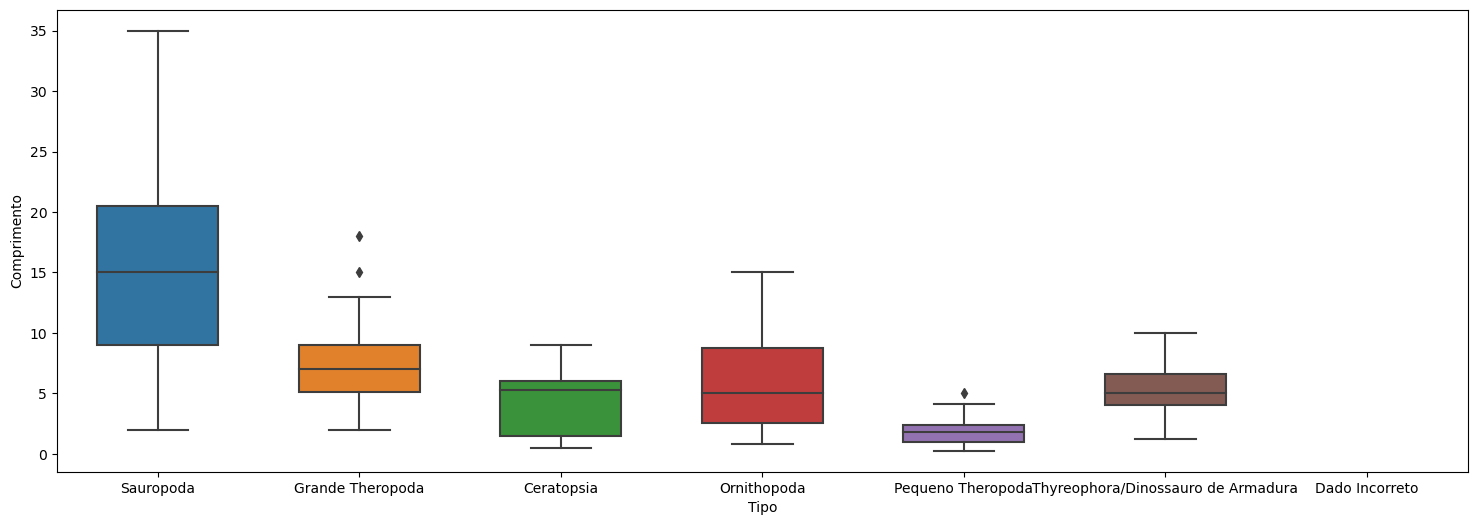

In [18]:
# a maneira que considero mais fácil de identificar visualmente um outlier é através de um boxplot
# aqui prefiro plotar um boxplot pelo tipo de dinossauro no eixo x e o comprimento deles no eixo y
# seria a maneira mais fácil de identificarmos os outliers, pois lá nas traduções demos o nome de "Dado Incorreto" 
# para um dos tipos que estava "gritando" outlier
boxplot_dinos = plt.figure(figsize=(18.2, 6))
sns.boxplot('Tipo', 'Comprimento', data= dados, width = 0.6)

Não temos informações onde classificamos como "Dado Incorreto", a presença de outliers estão em outros tipos de dinossauros, mas ignoraremos essa informação, pois não é estranho ou discrepante demais os comprimentos ali marcados para tais tipos. 

Quando falamos de Grandes Theropodas(ou Theropodas Gigantes) podemos dar o exemplo de um dos mais famosos, o Spinossauro, que possuia cerca de 15m de comprimento (as vezes até mais). 
Ao falarmos de Pequenos Theropodas podemos falar do já mencionado Microraptor, com seu "gigantesco tamanho" que podia chegar de 50cm a 70cm de comprimento.

Fonte: Wikipedia

Sendo assim, podemos considerar que estamos no caminho certo para a conclusão dos nossos problemas definidos.

### 3. Visualizações

Com base no nosso dataset podemos tirar alguns insights extras antes da resolução dos nossos três problemas estipulados no começo do projeto, vamos ver?

###### a) Qual será o país com o maior número de dinossauros catalogados no diretório? 

<AxesSubplot:title={'center':'Dinossauros Por Região/País'}>

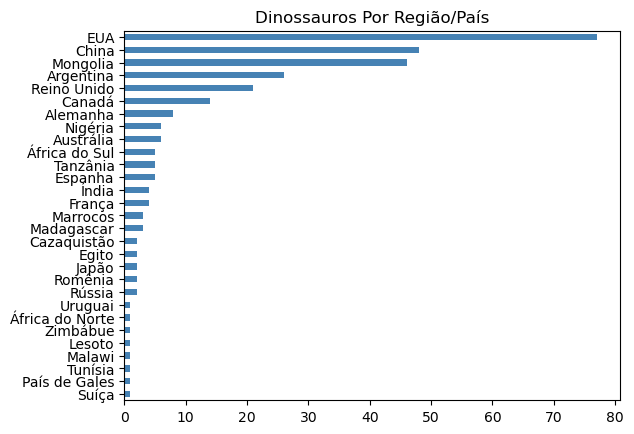

In [19]:
fig1 = dados['Região/País'].value_counts().plot.barh(color = 'steelblue')
plt.gca().invert_yaxis() 
plt.title("Dinossauros Por Região/País")
fig1

Os EUA é o país com o maior número de dinossauros catalogados no diretório de dinossauros do Museu de História Natural do Reino Unido. 


###### b) Qual o período com mais dinossauros no diretório?

<AxesSubplot:title={'center':'Dinossauros Por Período'}>

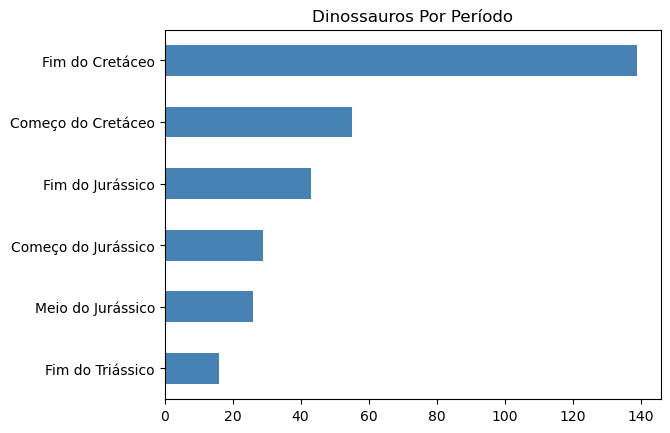

In [20]:
fig2 = dados['Período'].value_counts().plot.barh(color = 'steelblue')
plt.gca().invert_yaxis() 
plt.title("Dinossauros Por Período")
fig2

O maior número de dinossauros catalogados é do Fim do Cretáceo

##### c) Quais os maiores dinossauros do diretório?

In [21]:
dados['Nome do Dinossauro'].count()

309

Como temos 309 dinossauros catalogados, é melhor escolhermos os 5 maiores para visualizarmos, não é mesmo?

(<Figure size 1000x500 with 1 Axes>,
 <AxesSubplot:title={'center':'Maiores 5 Dinossauros'}, ylabel='Comprimento (m)'>)

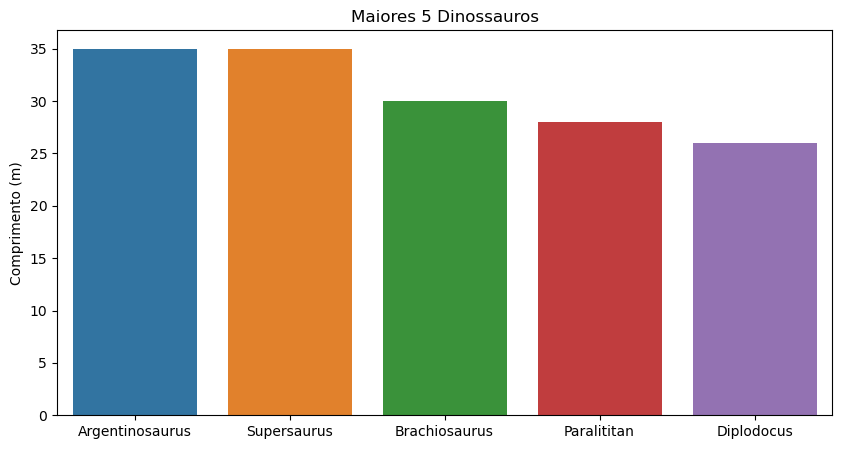

In [22]:
# separando esses dinossauros
colunas = ['Nome do Dinossauro', 'Comprimento', 'Região/País']
maiores_dinos = dados.nlargest(n = 5, columns = 'Comprimento')[colunas]
maiores_dinos

# agora podemos visualizar!
fig3 = fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x= 'Nome do Dinossauro', y= 'Comprimento', data=maiores_dinos)
plt.title('Maiores 5 Dinossauros')
plt.ylabel('Comprimento (m)')
plt.xlabel('')
fig3

Temos nossos gigantes: Argentinosaurus e o Supersaurus com 35m de comprimento!

## Vamos resolver os problemas propostos?

###### Em quais países identificamos os maiores dinossauros?

(<Figure size 1000x500 with 1 Axes>,
 <AxesSubplot:title={'center':'Maiores 5 Dinossauros'}, ylabel='Comprimento (m)'>)

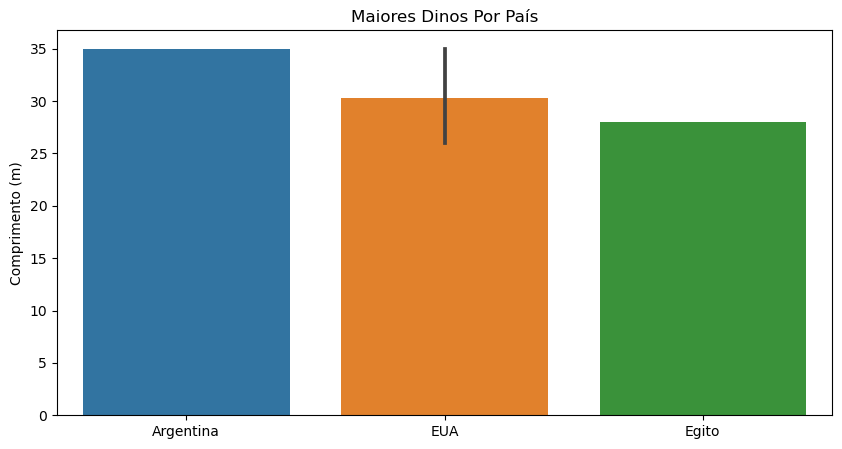

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x= 'Região/País', y= 'Comprimento', data=maiores_dinos)
plt.title('Maiores Dinos Por País')
plt.ylabel('Comprimento (m)')
plt.xlabel('')
fig3

Podemos observar que os maiores dinossauros encontram-se na Argentina, EUA e Egito! 
Notamos aquela linha na extremidade da barra que representa os EUA, isso quer dizer que há outro(s) grande(s) dinossauro(s) identificados no país!

###### Qual o tipo da dieta de dinossauro mais catalogada diretório? (carnívoro, herbívoro, onívoro)

<AxesSubplot:title={'center':'Dinossauros Por Dieta'}>

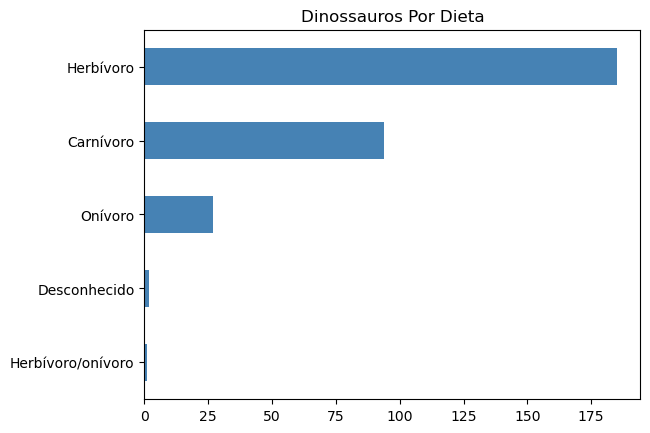

In [25]:
fig4 = dados['Dieta'].value_counts().plot.barh(color = 'steelblue')
plt.gca().invert_yaxis() 
plt.title("Dinossauros Por Dieta")
fig4

Notamos que o tipo de dieta mais catalogado em nosso dataset são de dinossauros herbívoros

### Conclusão

O objetivo projeto de treino de DataViz, foi além da resolução dos 3 problemas propostos, foi mostrar como a visualização dos dados de maneira 2D nos auxilia na possibilidade de tirarmos outros insights além do que nos é proposto com um conjunto de dados de maneira básica.



Dinossauros são uma paixão minha desde de criança, resolvi utilizar o tema como um dos meus primeiros projetos-treino. Onde acabei focando no tratamento dos dados por "capricho", no intuito de tradução das variáveis como um passatempo e utilizar de recursos que aprendi muito mais através de pesquisa nas bibliotecas, antes de querer me aprofundar na área e optando por uma graduação.

### Pontos de melhoria: 
 - Com certeza uma melhor forma de extrair as traduções! O código ficou extremamente repetitivo, poderia ter criado um dicionário com listas, mas tenho certeza que a utilização de um API teria salvado o tamanho do código.
 - Não trabalhar com tantos caracteres especiais como acentos nos nomes das colunas, pois não facilita muito os códigos.